In [1]:
import pandas as pd
import numpy as np
import utils   # some convenient functions
import datetime

%load_ext autoreload
%autoreload 2

# 1. Johns Hopkins has international data.  And US data down to county level after 3/22/2020

In [14]:
jhs_data = utils.load_jhs_raw()

In [16]:
china = jhs_data[(jhs_data['Country_Region'] == 'China') & (jhs_data['Province_State'] == 'Hubei')]
pd.pivot_table(china, index='Update_Date', values='Deaths', aggfunc='sum').head()

,Deaths
Update_Date,
2020-03-11,3046.0
2020-03-12,3056.0
2020-03-13,3062.0
2020-03-14,3075.0
2020-03-15,3085.0


In [18]:
china.head()

,Province_State,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Lat,Long_,FIPS,Admin2,Active,Combined_Key,Update_Date
0,Hubei,China,2020-03-11 10:53:02,67773.0,3046.0,49134.0,30.9756,112.2707,NaN,,15593.0,"Hubei,China",2020-03-11
0,Hubei,China,2020-03-12 09:53:06,67781.0,3056.0,50318.0,30.9756,112.2707,NaN,,14407.0,"Hubei,China",2020-03-12
0,Hubei,China,2020-03-13 11:09:03,67786.0,3062.0,51553.0,30.9756,112.2707,NaN,,13171.0,"Hubei,China",2020-03-13
0,Hubei,China,2020-03-14 10:13:09,67790.0,3075.0,52960.0,30.9756,112.2707,NaN,,11755.0,"Hubei,China",2020-03-14
0,Hubei,China,2020-03-15 18:20:18,67794.0,3085.0,54288.0,30.9756,112.2707,NaN,,10421.0,"Hubei,China",2020-03-15


#### Cook county, IL, USA data

In [5]:
jhs_data[(jhs_data['Country_Region'] == 'US') & (jhs_data['Province_State'] == 'California') & (jhs_data['Admin2'] == 'Santa Clara')].tail(30)

,Province_State,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Lat,Long_,FIPS,Admin2,Active,Combined_Key,Update_Date
2529,California,US,2020-03-27 22:14:55,574.0,20.0,0.0,37.231049,-121.697046,6085.0,Santa Clara,0.0,"Santa Clara, California, US",2020-03-27
2529,California,US,2020-03-28 23:05:00,591.0,25.0,0.0,37.231049,-121.697046,6085.0,Santa Clara,0.0,"Santa Clara, California, US",2020-03-28
2529,California,US,2020-03-29 23:08:00,646.0,25.0,0.0,37.231049,-121.697046,6085.0,Santa Clara,0.0,"Santa Clara, California, US",2020-03-29
2529,California,US,2020-03-30 22:52:00,848.0,28.0,0.0,37.231049,-121.697046,6085.0,Santa Clara,0.0,"Santa Clara, California, US",2020-03-30
1701,California,US,2020-03-31 23:43:56,890.0,30.0,0.0,37.231049,-121.697046,6085.0,Santa Clara,0.0,"Santa Clara, California, US",2020-03-31
1743,California,US,2020-04-01 21:58:49,956.0,32.0,0.0,37.231049,-121.697046,6085.0,Santa Clara,0.0,"Santa Clara, California, US",2020-04-01
1808,California,US,2020-04-02 23:25:00,1019.0,36.0,0.0,37.231049,-121.697046,6085.0,Santa Clara,0.0,"Santa Clara, California, US",2020-04-02
1852,California,US,2020-04-03 22:46:37,1019.0,36.0,0.0,37.231049,-121.697046,6085.0,Santa Clara,0.0,"Santa Clara, California, US",2020-04-03
1898,California,US,2020-04-04 23:34:00,1148.0,39.0,0.0,37.231049,-121.697046,6085.0,Santa Clara,0.0,"Santa Clara, California, US",2020-04-04
1964,California,US,2020-04-05 23:06:45,1207.0,39.0,0.0,37.231049,-121.697046,6085.0,Santa Clara,0.0,"Santa Clara, California, US",2020-04-05


In [66]:
jhs_data[(jhs_data['Country_Region'] == 'US') & (jhs_data['Province_State'] == 'Illinois') & (jhs_data['Admin2'] == 'Cook')].tail()

,Province_State,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Lat,Long_,FIPS,Admin2,Active,Combined_Key,Update_Date
478,Illinois,US,2020-04-02 23:25:27,5575.0,107.0,0.0,41.841448,-87.816588,17031.0,Cook,0.0,"Cook, Illinois, US",2020-04-02
484,Illinois,US,2020-04-03 22:46:37,6111.0,141.0,0.0,41.841448,-87.816588,17031.0,Cook,0.0,"Cook, Illinois, US",2020-04-03
495,Illinois,US,2020-04-04 23:34:21,7439.0,167.0,0.0,41.841448,-87.816588,17031.0,Cook,0.0,"Cook, Illinois, US",2020-04-04
510,Illinois,US,2020-04-05 23:06:45,8034.0,186.0,0.0,41.841448,-87.816588,17031.0,Cook,0.0,"Cook, Illinois, US",2020-04-05
513,Illinois,US,2020-04-06 23:22:15,8728.0,209.0,0.0,41.841448,-87.816588,17031.0,Cook,0.0,"Cook, Illinois, US",2020-04-06


#### Plot New York State Data

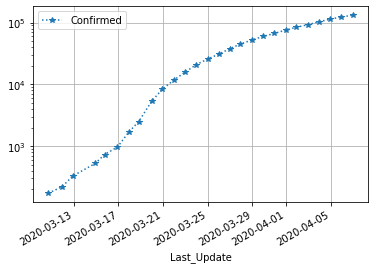

In [67]:
ny_data = jhs_data[(jhs_data['Country_Region'] == 'US') & (jhs_data['Province_State'] == 'New York')]
frm = ny_data[['Last_Update', 'Confirmed']].groupby('Last_Update').sum()
frm.plot(y='Confirmed', logy=True, grid=True, style='*:')

#### Check Italy Data (no province and state info)

In [70]:
jhs_data[jhs_data['Country_Region'] == 'Italy'].tail()

,Province_State,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Lat,Long_,FIPS,Admin2,Active,Combined_Key,Update_Date
2472,NaN,Italy,2020-04-02 23:25:14,115242.0,13915.0,18278.0,41.87194,12.56738,NaN,NaN,83049.0,Italy,2020-04-02
2528,NaN,Italy,2020-04-03 22:46:20,119827.0,14681.0,19758.0,41.87194,12.56738,NaN,NaN,85388.0,Italy,2020-04-03
2582,NaN,Italy,2020-04-04 23:34:04,124632.0,15362.0,20996.0,41.87194,12.56738,NaN,NaN,88274.0,Italy,2020-04-04
2665,NaN,Italy,2020-04-05 23:06:26,128948.0,15887.0,21815.0,41.87194,12.56738,NaN,NaN,91246.0,Italy,2020-04-05
2709,NaN,Italy,2020-04-06 23:21:55,132547.0,16523.0,22837.0,41.87194,12.56738,NaN,NaN,93187.0,Italy,2020-04-06


# 2. Testing Data From CovidTracking Project

In [2]:
import json
import urllib.request

In [3]:
url_states_current = 'https://covidtracking.com/api/states'
url_states_daily = 'https://covidtracking.com/api/states/daily'
test_daily = urllib.request.urlopen(url_states_daily).read().decode()
data_json = json.loads(test_daily)

In [4]:
data = pd.read_csv(url_states_daily + '.csv')
data['date'] = pd.to_datetime([str(d) for d in data['date']])
data = data.sort_values(by='date')

In [5]:
frm = data[data['state']=='IL'].set_index('date')   # one state
#frm = pd.pivot_table(data, index='date', aggfunc='sum')  # whole contry
frm['dailyPositiveRate'] = frm['positiveIncrease'] / frm['totalTestResultsIncrease']
frm.tail()

,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,dailyPositiveRate
date,,,,,,,,,,,,,,,,,,,,,
2020-05-03,IL,61499.0,257814.0,NaN,4701.0,NaN,1232.0,NaN,759.0,NaN,...,319313,319313,319313,17,59.0,0.0,16423.0,2994.0,19417.0,0.154195
2020-05-04,IL,63840.0,269307.0,NaN,4493.0,NaN,1232.0,NaN,763.0,NaN,...,333147,333147,333147,17,44.0,0.0,11493.0,2341.0,13834.0,0.169221
2020-05-05,IL,65962.0,280324.0,NaN,4780.0,NaN,1266.0,NaN,780.0,NaN,...,346286,346286,346286,17,176.0,0.0,11017.0,2122.0,13139.0,0.161504
2020-05-06,IL,68232.0,293028.0,NaN,4832.0,NaN,1231.0,NaN,780.0,NaN,...,361260,361260,361260,17,136.0,0.0,12704.0,2270.0,14974.0,0.151596
2020-05-07,IL,70873.0,308170.0,NaN,4862.0,NaN,1253.0,NaN,766.0,NaN,...,379043,379043,379043,17,137.0,0.0,15142.0,2641.0,17783.0,0.148513


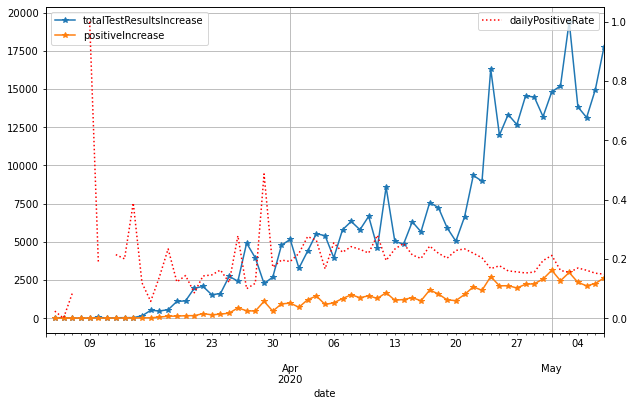

In [6]:
#fig, ax = plt.subplots()
ax = frm.plot(y=['totalTestResultsIncrease', 'positiveIncrease'], grid=True, style='-*')
ax.legend(loc='upper left')
ax2 = ax.twinx()
frm.plot(y='dailyPositiveRate', ax=ax2, color='red', style=':', figsize=(10, 6))
ax2.legend(loc='upper right')

In [7]:
frm.to_csv('../outputs/frm_2020-04-29.csv')

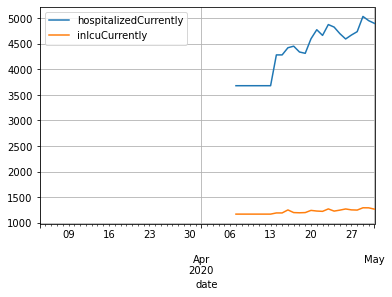

In [25]:
frm.plot(y=['hospitalizedCurrently', 'inIcuCurrently'], grid=True)

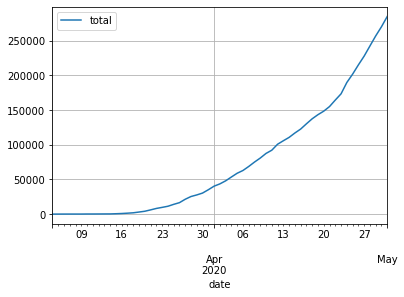

In [27]:
frm.plot(y=['total'], grid=True)

## CDC Tests Results

In [ ]:
cdc_link = ''

# 3. Kaggle Data contains some medical info

In [85]:
data = pd.read_csv('https://raw.githubusercontent.com/beoutbreakprepared/nCoV2019/master/latest_data/latestdata.csv')

C:\Users\Jian\Anaconda3\envs\research\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1,2,10,11,13,14,15,16,17,18,19,20,22,23,24,25,26,27,31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [86]:
data.shape

(261558, 34)

In [87]:
data.head()

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary
0,000-1-,30-39,female,Snohomish County,Washington,United States,1.0,48.048180,-121.696000,admin2,...,NaN,NaN,NaN,NaN,Snohomish County,Washington,United States,2988,NaN,NaN
1,000-1-,NaN,NaN,NaN,Khuzestan,Iran,1.0,31.496225,48.967279,admin1,...,NaN,NaN,NaN,NaN,NaN,Khuzestan,Iran,15,NaN,NaN
2,000-1-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000-1-,50-59,male,Snohomish County,Washington,United States,1.0,48.048180,-121.696000,admin2,...,NaN,NaN,NaN,NaN,Snohomish County,Washington,United States,2988,NaN,NaN
4,000-1-,NaN,NaN,NaN,Pays de la Loire,France,1.0,47.486460,-0.811280,admin1,...,NaN,NaN,NaN,NaN,NaN,Pays de la Loire,France,12,NaN,NaN


# 4. NYTimes Data

In [5]:
nyt_link_county = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
nyt_link_state = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'

In [24]:
nyt_county = pd.read_csv(nyt_link_county)
nyt_state = pd.read_csv(nyt_link_state)

In [23]:
nyt_county.to_csv('nyt_county.csv')

In [8]:
nyt_county.tail()

,date,county,state,fips,cases,deaths
23962,2020-03-31,Sheridan,Wyoming,56033.0,10,0
23963,2020-03-31,Sublette,Wyoming,56035.0,1,0
23964,2020-03-31,Sweetwater,Wyoming,56037.0,2,0
23965,2020-03-31,Teton,Wyoming,56039.0,23,0
23966,2020-03-31,Washakie,Wyoming,56043.0,1,0


In [25]:
x = pd.pivot_table(nyt_county, index=['state'], columns=['date'], values=['cases'], aggfunc='sum')

In [26]:
x.loc['Illinois']

       date      
cases  2020-01-21       NaN
       2020-01-22       NaN
       2020-01-23       NaN
       2020-01-24       1.0
       2020-01-25       1.0
                      ...  
       2020-03-27    3087.0
       2020-03-28    3602.0
       2020-03-29    4673.0
       2020-03-30    5125.0
       2020-03-31    6046.0
Name: Illinois, Length: 71, dtype: float64

In [22]:
nyt_state[nyt_state['state'] == 'Illinois']

,date,state,fips,cases,deaths
3,2020-01-24,Illinois,17,1,0
6,2020-01-25,Illinois,17,1,0
10,2020-01-26,Illinois,17,1,0
14,2020-01-27,Illinois,17,1,0
18,2020-01-28,Illinois,17,1,0
...,...,...,...,...,...
1349,2020-03-27,Illinois,17,3029,37
1403,2020-03-28,Illinois,17,3547,50
1458,2020-03-29,Illinois,17,4613,70
1513,2020-03-30,Illinois,17,5070,84


# 5. USA Facts Data

In [ ]:
usafacts_confirm_link = 'https://usafactsstatic.blob.core.windows.net/public/data/covid-19/covid_confirmed_usafacts.csv'
usafacts_death_link = 'https://usafactsstatic.blob.core.windows.net/public/data/covid-19/covid_deaths_usafacts.csv'
